In [25]:
#@title librerías

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from scipy.optimize import curve_fit

miraremos como hacer el fit de datos, aún si lo que se tiene no es una regresión lineal.

la idea es asociar datos experimentaes a un modelo físico.

por ejemplo, si tenemos un péndulo amortiguado, la idea es encontrar la ecuación, que se asocia al modelo que ya conocemos --> naturaleza del movimiento

es importante darle una interpretabilidad a los datos

In [5]:
#comenzamos por generar datos sintéticos

b= 2 #constante
x = np.linspace(0, 10, 100)
y = 2.1 * x + b

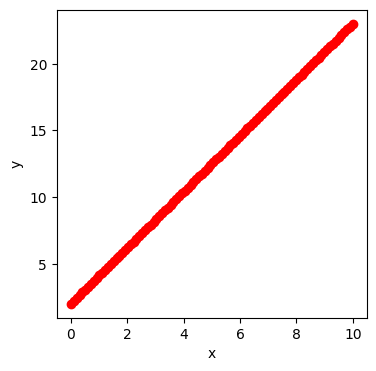

In [9]:
plt.figure(figsize =(4,4))
plt.plot(x, y, 'ro')
plt.xlabel('x')
plt.ylabel('y');

la idea es ahora generar una perturbacion al anterior grafico, tomando algunos numeros aleatorios

In [13]:
rng = np.random.random(10) #salen entre 0 y 1
rng

array([0.01345026, 0.13928063, 0.79342909, 0.58225489, 0.37089653,
       0.87433401, 0.04566237, 0.38204654, 0.49329931, 0.52119068])

In [14]:
rng = 2 * np.random.random(10) -1 #salen entre -1 y 1
rng

array([-0.59150963,  0.77190658, -0.26070739,  0.99987073,  0.7910971 ,
       -0.24588097,  0.19590696, -0.2117968 , -0.88547811,  0.43725974])

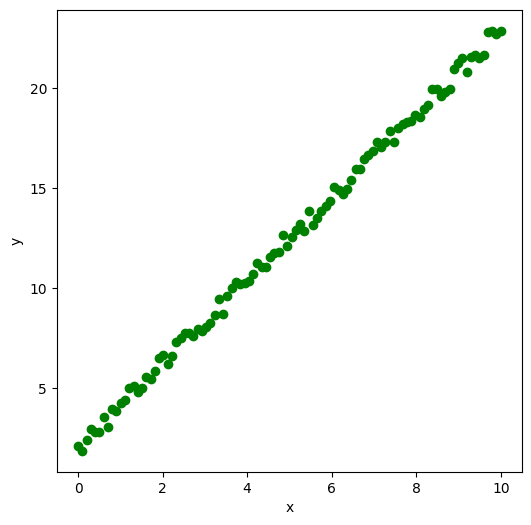

In [21]:
N = 100

b= 2 #constante
rng = 0.5 * (2 * np.random.random(100) - 1)   #entre 0.1 y -0.1
x = np.linspace(0, 10, 100)
y = 2.1 * x + b + rng                         #añadimos la pequeña dispersion a la ecuación que nosotros tenemos

plt.figure(figsize =(6,6))
plt.plot(x, y , 'go')
plt.xlabel('x')
plt.ylabel('y');

la idea es ahora hacer el fit

In [27]:
#@title scipy.optimize.curve_fit

def fun(x, a, b):
  return a*x + b            #identificamos el modelo que siguen nuestros datos

In [42]:
params_fit = curve_fit(fun, x, y)  #regresa los parámetros en el mismo orden en el cual definí la función

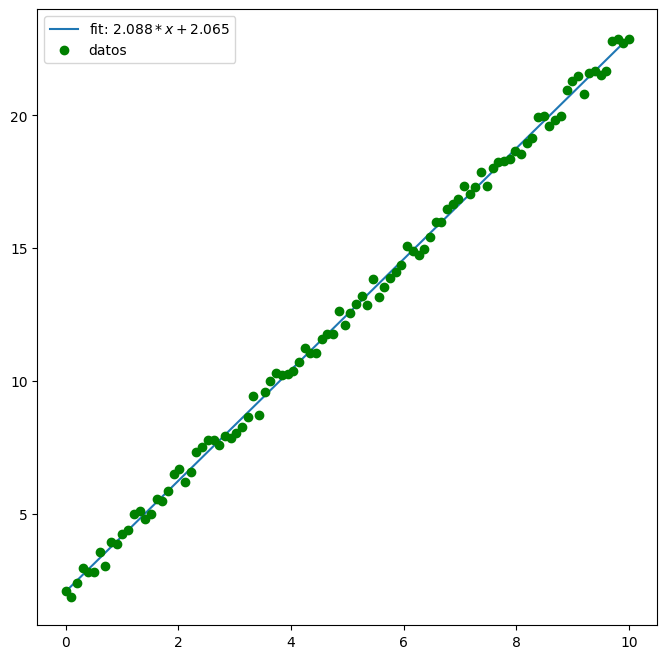

In [41]:
plt.figure(figsize =(8,8))

x_ = np.linspace(min(x), max(x), 1000)
y_fit = fun(x_, *params_fit[0])
plt.plot(x_, y_fit, label = f'fit: ${params_fit[0][0]:.3f} * x + {params_fit[0][1]:.3f}$')
plt.plot(x,y, 'go', label ='datos')

plt.legend();

#análisis péndulo

In [51]:
url ='https://docs.google.com/spreadsheets/d/e/2PACX-1vS1lEPPNLT-DSq_H7poElsIt7LWjSatk9OKxUfXchgMyEoqY-yA_7hvd87t4i2mjNqC5LWAWetR7f3q/pub?gid=1833445323&single=true&output=csv'

In [69]:
df = pd.read_csv(url, sep =';', decimal='.')
df = df.rename(columns = {'Tiempo (ms)' : 'Tiempo_ms', 'Ángulo 1,' : 'AnguloDeg'})
df['Tiempo_s'] = df.Tiempo_ms / 1000
df.AnguloDeg = df.AnguloDeg.str.replace(',' , '.').astype(float)
df['AnguloRad'] = np.deg2rad(df.AnguloDeg)
df

,Tiempo_ms,AnguloDeg,Tiempo_s,AnguloRad
0,9,59.289612,0.009,1.034799
1,42,59.982327,0.042,1.046889
2,75,61.237453,0.075,1.068795
3,108,63.492477,0.108,1.108153
4,142,65.388771,0.142,1.141249
...,...,...,...,...
2842,94709,94.937576,94.709,1.656973
2843,94743,96.479851,94.743,1.683891
2844,94776,97.940689,94.776,1.709387
2845,94809,99.318092,94.809,1.733428


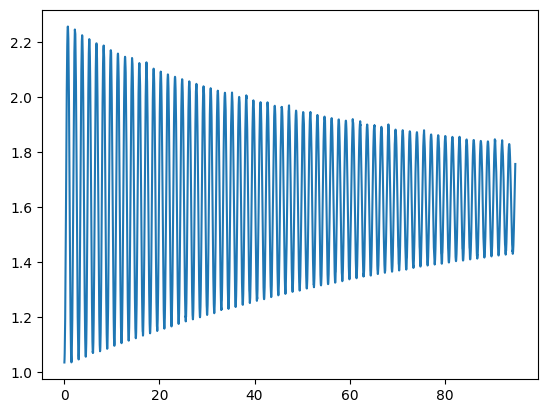

In [72]:
plt.plot(df.Tiempo_s, df.AnguloRad);

In [67]:
#procedemos ahora a definir la función para realizar el fit

def func(t, A, alpha, omega, phi, cte):
  return A * np.exp(-alpha * t) * np.cos(omega * t + phi) + cte      #sumamos una cste, ya que no se encuentra centrado en el cero

In [71]:
params_fit = curve_fit(func, df.Tiempo_s, df.AnguloRad)  
params_fit

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([-0.61320999,  0.01261673,  4.19498073, -0.16574795,  1.63193062]),
 array([[ 5.79232322e-06, -1.92006132e-07,  1.73190792e-09,
         -7.90227554e-08,  9.68379975e-10],
        [-1.92006132e-07,  1.04228248e-08, -6.76388210e-11,
          2.83742979e-09, -1.99735148e-10],
        [ 1.73190792e-09, -6.76388210e-11,  1.04361660e-08,
         -3.14606244e-07,  3.66833751e-10],
        [-7.90227554e-08,  2.83742979e-09, -3.14606244e-07,
          1.54947541e-05, -2.11267024e-08],
        [ 9.68379975e-10, -1.99735148e-10,  3.66833751e-10,
         -2.11267024e-08,  4.28632130e-07]]))

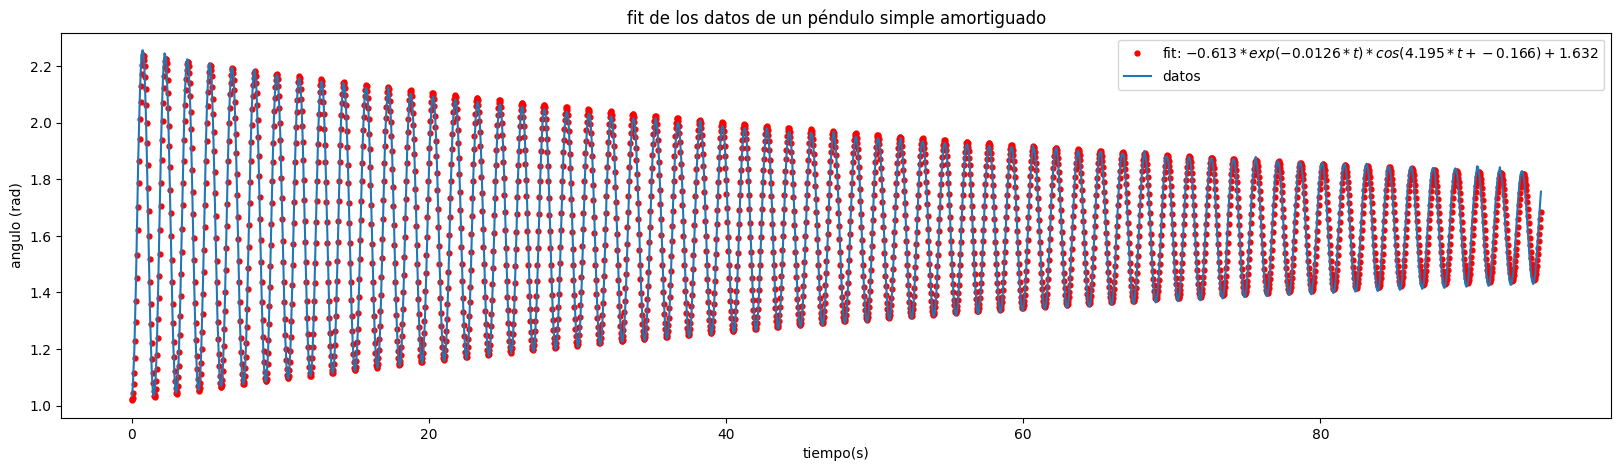

In [87]:
plt.figure(figsize =(20,5))
y_fit = func(df.Tiempo_s, *params_fit[0])

plt.plot(df.Tiempo_s, y_fit,'r.', ms =7 ,label = f'fit: ${params_fit[0][0]:.3f} * exp({-params_fit[0][1]:.3}*t) * cos({params_fit[0][2]:.3f} * t + {params_fit[0][3]:.3f}) + {params_fit[0][4]:.3f}$')
plt.plot(df.Tiempo_s, df.AnguloRad, label ='datos')
plt.xlabel('tiempo(s)')
plt.ylabel('angulo (rad)')
plt.title('fit de los datos de un péndulo simple amortiguado')

plt.legend();